## Exploratory Data Analysis using automobile dataset from Kaggle
###### https://www.kaggle.com/toramky/automobile-dataset

### Import modules that will be used

In [405]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

#### Import the dataset

In [406]:
# Function provided by pandas to import csv data 
dataset = pd.read_csv('Automobile_data.csv', na_values='?') # Consider all "?" as null values
dataset.head(3) # Preview top three rows of the data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0


## Preprocess data

Any exploratory Data Analysis and Machine Learning tasks should always be starting with some data preprocessing for an optimized result

#### The pandas function below is very important to see how pandas interpreted the attributes data type

In [407]:
dataset.dtypes # Information about the dataset

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

<span style='color: brown; font-weight: bold'>*Sometimes, pandas import does not infer correctly the type of the attribute data, so additionnal processing is necessary.One can refer to the links below for more informations*.</span>
<br>
To convert attribute type in pandas, one can refer to the link below : <br>
><a target="_blank">https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html</a>
 <br>
    Other links that seem interesting to take a look at :
    <br />
     >><a target="_blank">https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.convert_dtypes.html</a>
    <br />
    >><a target="_blank">https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.infer_objects.html</a>


#### I want to identify all columns that contain null value to deal with

In [408]:
with_null_cols=list(dataset.columns[dataset.isna().any()])

In [409]:
missing_dataset = dataset[with_null_cols].isna()

# Number of nan values in each column
for column in missing_dataset:
    print(column, ":")
    print(missing_dataset[column].value_counts(), end="\n\n\n")

normalized-losses :
False    164
True      41
Name: normalized-losses, dtype: int64


num-of-doors :
False    203
True       2
Name: num-of-doors, dtype: int64


bore :
False    201
True       4
Name: bore, dtype: int64


stroke :
False    201
True       4
Name: stroke, dtype: int64


horsepower :
False    203
True       2
Name: horsepower, dtype: int64


peak-rpm :
False    203
True       2
Name: peak-rpm, dtype: int64


price :
False    201
True       4
Name: price, dtype: int64




#### One way to deal with missing numbers is to put in the average value of the entire attribute
<div class='alert alert-info'>
    Creating a function that replaces NaN values to mean for number data types
</div> 

In [424]:
def replace_by_mean(dataframe, column):
    return dataframe[column].replace(np.nan, dataframe[column].mean(), inplace=True)

#### One way to deal with missing categorical data is to put in the most frequent category
<div class='alert alert-info'>
    Creating a function that replaces NaN values to the most frequent one for categorical data types
</div>  

In [427]:
def replace_by_most_frequent(dataframe, column):
    return dataframe[column].replace(np.nan, dataframe[column].mode()[0], inplace=True)

# Another way which leads to the same result is to use the value_counts function

# def replace_by_most_frequent(dataframe, column):
#     return dataframe[column].replace(np.nan, dataframe[column].value_counts().idxmax(), inplace=True)

<div class='alert alert-info'>
    Creating a function that replaces NaN values to the concerned columns
</div>  

In [412]:
def replace_nulls(dataframe, columns):
    for col in columns:
        if dataframe[col].dtype=='object':
            replace_by_most_frequent(dataframe, col)
        else:
            replace_by_mean(dataframe, col)

**Now calling the *replace_nulls()* function to replace all null (NaN) values for the concerned columns**

In [426]:
# Replacing all null values for each column of whatever type

replace_nulls(dataset, with_null_cols)

In [431]:
# Taking a look at the top 3 rows of the data

dataset.head(3)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0


In [416]:
# split_equally_by_four = np.linspace(dataset['price'].min(), dataset['price'].max(), 5)
# price_categories = ['low', 'medium', 'pretty high', 'high']
# categorized = pd.cut(dataset['price'], split_equally_by_four, labels=price_categories, include_lowest=True)

## Asking a question : 
> <span style='color:brown; font-size:20px'>*what is the average price given a fuel type with respect to each body style ?*</span>

### We have to wrangle the data in order to answer that question

In [417]:
# Retrieve the needed columns
sub_data = dataset[['fuel-type', 'body-style', 'price']]
average_mean = sub_data.groupby(['fuel-type', 'body-style'], as_index=False).mean()

# Read the result in an easier way by pivoting the answer
pivot_data = average_mean.pivot(index='fuel-type', columns='body-style')
pivot_data

price                                                   
body-style convertible  hardtop     hatchback         sedan         wagon
fuel-type                                                                
diesel             NaN  28176.0   7788.000000  14774.400000  19727.666667
gas            21890.5  21356.0  10083.076213  14370.558749  11368.909091

> <span style='color:brown; font-size:20px'>Interestingly, we can conclude from the data aggregation above that:<span>
>> <ol style='font-weight:bold'>
    <li>A diesel convertible car does not exist in this dataset.</li>
    <li>A diesel convertible car does not exist in this dataset.</li>
    <li>A hatchback diesel is the cheapest one.</li>
</ol>

**We can visualize the pivot data to get more intuition about the relationships between the fuel type, body style and the price**

<AxesSubplot:xlabel='None-body-style', ylabel='fuel-type'>

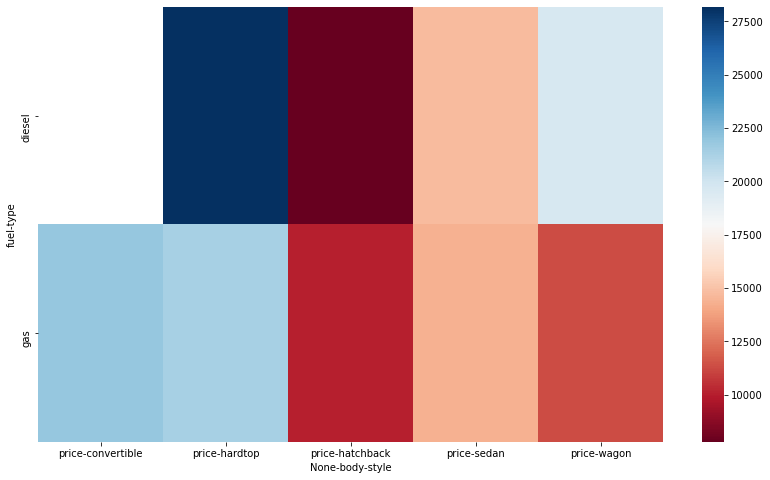

In [418]:
plt.figure(figsize=(14,8))
sns.heatmap(pivot_data, cmap='RdBu')

> **Yet, interestingly:** It's easier now to see which type of car based on *two attributes* (the body style and fuel type) gauged by the bar color on the right hand side from the heatmap above is the most expensive, the cheapest and at medium price one.

## Finding attributes correlation

**Note:** *correlation does not imply causation* 
> If like me you want more info about this, please visit:

> https://en.wikipedia.org/wiki/Correlation_does_not_imply_causation

In [429]:
# List all attributes in our dataset
list(dataset.columns)

['symboling',
 'normalized-losses',
 'make',
 'fuel-type',
 'aspiration',
 'num-of-doors',
 'body-style',
 'drive-wheels',
 'engine-location',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-type',
 'num-of-cylinders',
 'engine-size',
 'fuel-system',
 'bore',
 'stroke',
 'compression-ratio',
 'horsepower',
 'peak-rpm',
 'city-mpg',
 'highway-mpg',
 'price']

##### Correlation between the engine size and the price of a car from visualization

<AxesSubplot:xlabel='engine-size', ylabel='price'>

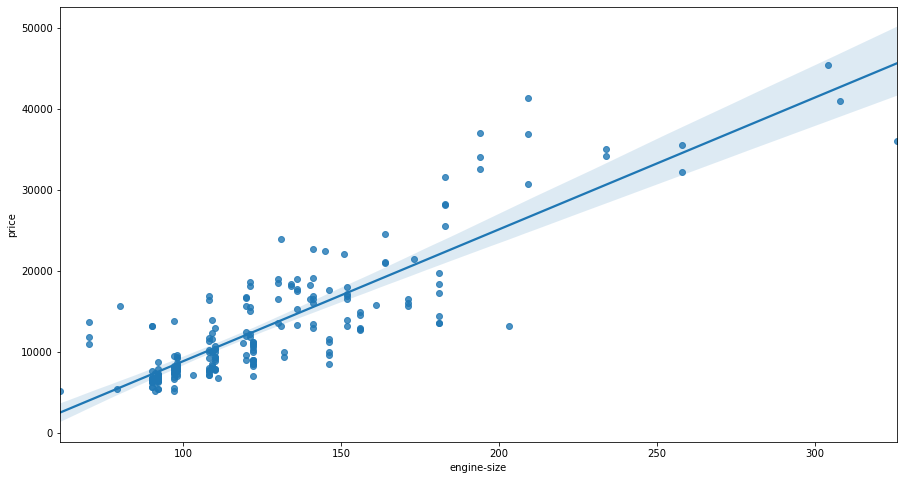

In [420]:
plt.figure(figsize=(15,8))
sns.regplot(x="engine-size", y="price", data=dataset)

> **As we could see from the graph above, there is a positive correlation between the engine-size and the price of a car**

#### Correlation between the highway miles per gallon and the price

(0.0, 48133.65722510859)

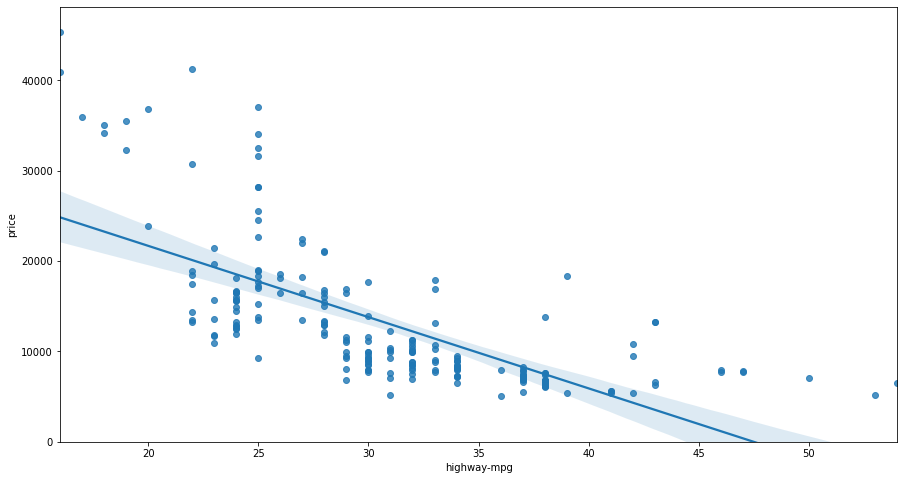

In [421]:
plt.figure(figsize=(15,8))
sns.regplot(x="highway-mpg", y="price", data=dataset)
plt.ylim(0, )

> **As we could see from the graph above, the highway miles per gallon and the price are negatively correlated** 

**Correlation between the compression ratio and the price** 

<AxesSubplot:xlabel='compression-ratio', ylabel='price'>

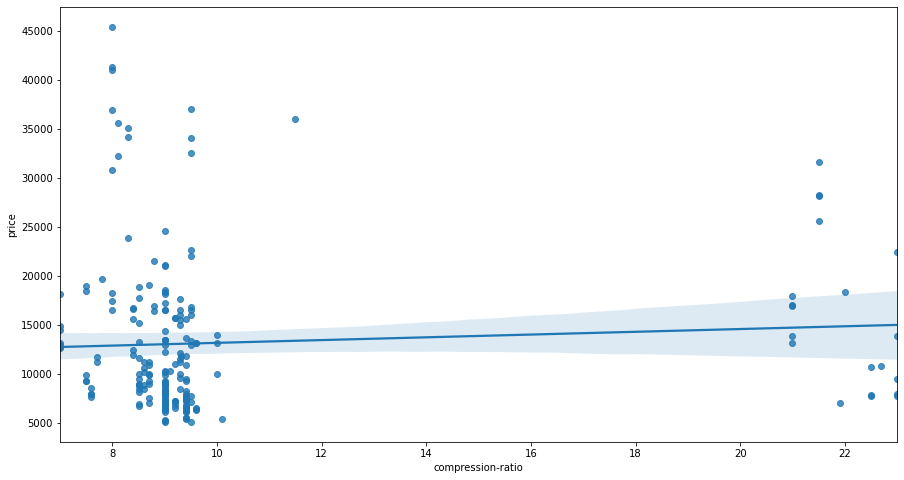

In [422]:
plt.figure(figsize=(15, 8))
sns.regplot(x='compression-ratio', y='price', data=dataset)

> **As seen from the graph, there is no correlation between the compression ratio variable and the price of car**

### Measure the strength of correlation between variables
> *In this notebook, we are going to use what's known as *Pearson Correlation**. Below is a link for more information.

> https://support.minitab.com/en-us/minitab-express/1/help-and-how-to/modeling-statistics/regression/how-to/correlation/methods-and-formulas/

>> The *Pearson* methods returns two parameters :
>> - Correlation coefficient (ranges between -1 and 1)
>> - **P-value (Weighs the certainty about the correlation)**:
>><ol>
    <li>if P-value < 0.001 then there is a <span style='font-weight:bold'>Strong</span> certainty about the correlation.</li>
    <li>if P-value < 0.05  then there is a <span style='font-weight:bold'>moderate</span> certainty about the correlation.</li>
    <li>if P-value < 0.1   then there is a <span style='font-weight:bold'>weak</span> certainty about the correlation.</li>
    <li>if P-value > 0.1   then there is <span style='font-weight:bold'>no</span> certainty at all. The attributes are not correlated</li>
</ol>

##### Pearson correlation between the engine size and the price of car

In [432]:
# Finding Pearson correlation by using the scipy.stats module
pearson_coeff, p_value=stats.pearsonr(dataset['engine-size'], dataset['price']) 
print('The correlation coefficient is :', pearson_coeff)
print('The P-value indicates a probability of :', p_value)

The correlation coefficient is : 0.861752243685972
The P-value indicates a probability of : 9.669661923635875e-62


> As we could see from the plots, the *engine size* and *the price* are positively correlated, and the Pearson correlation admitted it above, the P-value is way less than 0.001 therefore it assumes there is a strong certainty that the engine size and the price are positively correlated, which is the case.